In [ ]:
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torchvision import transforms

In [ ]:
# train 압축 풀기
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/ing_train4.zip' -d '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/'

In [ ]:
# val 압축 풀기
!unzip -qq '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/ing_val4.zip' -d '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/'

In [ ]:
train_data_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/ing_train4'
val_data_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/ing_val4'

In [ ]:
## 모델 학습 설정값.
hyperparams = {
    "batch_size": 12,
    "learning_rate": 0.001,
    "epochs": 50,
}

In [ ]:
## 이미지 변환 모듈 (데이터의 규격을 맞춘다)
transform_train = transforms.Compose(
    [
        transforms.Resize([224, 224]),
        transforms.ColorJitter(brightness=0.2, contrast=0.2),
        # transforms.RandomVerticalFlip(p=0.2),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]
)

transform_val = transforms.Compose(
    [
        transforms.Resize([224, 224]),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]
)

In [ ]:
## 데이터 세트를 정의한다. (이미지 폴더를 기준으로)
train_dataset = ImageFolder(train_data_dir, transform=transform_train)
val_dataset = ImageFolder(val_data_dir, transform=transform_val)

In [ ]:
## 데이터 개수 확인
print('train 데이터개수:', len(train_dataset))
print('val 데이터 개수:',len(val_dataset))

train 데이터개수: 4786
val 데이터 개수: 483


In [ ]:
# 클래스 개수 가져오기
train_num_classes = len(train_dataset.classes)
val_num_classes = len(val_dataset.classes)
print(f"Number of classes of Train: {train_num_classes}")
print(f"Number of classes of Val: {val_num_classes}")

Number of classes of Train: 69
Number of classes of Val: 69


In [ ]:
# 클래스 이름 가져오기
class_names = train_dataset.classes
print(f"Classes: {class_names}")

Classes: ['가래떡', '가자미', '가지', '감자', '건새우', '계란', '고구마', '고등어', '고사리', '고추', '곤드레', '굴', '근대', '김', '깻잎', '꼬막', '냉이', '다시마', '도토리가루', '돼지고기', '두부', '마늘', '맛살', '멍게', '멸치', '무', '미더덕', '미역', '밀가루', '배', '버섯', '부지깽이', '부추', '부침가루', '북어채', '삼겹살', '새우', '생강', '생강가루', '섬초', '성게', '소고기', '소시지', '숙주', '쑥', '아욱', '애호박', '양파', '얼갈이', '열무', '오이', '완두콩', '우엉', '우유', '잣', '전분', '조개', '중면', '쪽파', '차돌박이', '케일', '콩나물', '파', '파프리카', '피망', '현미', '호박', '홍합', '황태']


In [ ]:
# 데이터로더 import
from torch.utils.data import DataLoader

In [ ]:
## 배치 사이즈 : 한번에 불러올 데이터 개수
## shuffle : 순서를 랜덤하게 (중요!)
train_dataloader = DataLoader(
    train_dataset, batch_size=hyperparams['batch_size'], shuffle=True, drop_last=True
)
val_dataloader = DataLoader(
    val_dataset, batch_size=hyperparams['batch_size'], shuffle=False, drop_last=False
)

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4527 (\N{HANGUL JONGSEONG RIEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4358 (\N{HANGUL CHOSEONG MIEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 4462 (\N{HANGUL JUNGSEONG U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


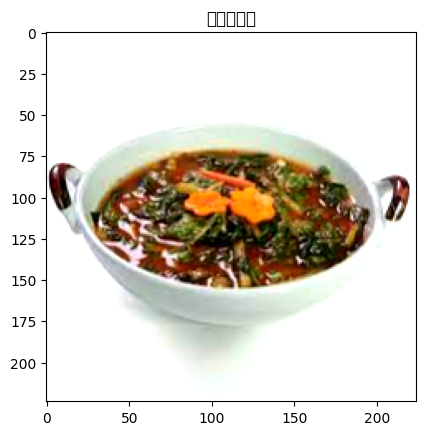

In [ ]:
# 데이터셋 불러와서 확인
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

## 데이터로더에서 데이터를 불러와서 출력한다.
## 데이터 변환 모듈로 정규화를 수행했기 때문에 다시 원본으로 돌려놓는 연산이 추가된다.
for image, label in train_dataloader:
    image = image[0]
    label = label[0]
    image = image.numpy().transpose((1, 2, 0))
    image = ((std * image + mean) * 255).astype(np.uint8)
    plt.imshow(image)
    plt.title(train_dataset.classes[int(label)])
    plt.show()

    break

In [ ]:
# timm 라이브러리 다운
!pip install timm

In [ ]:
import torch.nn
import timm

In [ ]:
# resnet50 모델 불러오기 (사전 훈련된 가중치 포함), 클래스 개수는 데이터세트에 맞게 설정
model = timm.create_model('resnet50', pretrained=True, num_classes=train_num_classes)

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

In [ ]:
import os
import torch.nn as nn
from torch import optim
from torch.nn import functional as F
from tqdm import tqdm

In [ ]:
## GPU가 있으면 연산장치를 "cuda"로 설정하고 아니면 "cpu"로 설정한다.
device = "cuda" if torch.cuda.is_available() else "cpu"

## 모델에 연상장치를 설정하고 학습 모드로 변경한다.
model = model.to(device).train()

## 학습할 때 사용할 loss 함수를 정의한다. 여기서는 cross-entropy를 사용
criterion = nn.CrossEntropyLoss().to(device)

## 학습 방법 (옵티마이저)를 설정한다. 기본적인 SGD를 사용한다.
optimizer = optim.Adam(
    model.parameters(),
    lr=hyperparams['learning_rate'] ## 학습률 (전이 학습이기 때문에 낮게 설정한다.)
)

'''
	iteration(이터레이션) : 데이터를 한번 입력하는 단위. 전체 데이터를 나눠서 입력한다.
	epoch(에폭, 이포크) : 전체 데이터를 다 입력했을 때 단위. 보통 전체 데이터를 여러번 학습한다.

'''

for epoch in range(hyperparams['epochs']):
    model.train()
    cost = 0.0

		## 데이터 로더에서 변환된 이미지 데이터와 클래스 번호를 불러와 학습한다.
		## for문에서 한번 호출될 때를 iteration이라 하며 for문을 전부 다 돌면 epoch이라 한다.
    for images, classes in tqdm(train_dataloader):
        images = images.to(device) ## 데이터에도 연산 장치를 설정
        classes = classes.to(device) ## 데이터에도 연산 장치를 설정

        optimizer.zero_grad() ## 옵티마이저에 저장된 기울기 값을 초기화한다.
        output = model(images) ## 모델에 데이터를 입력하여 출력값을 생성
        loss = criterion(output, classes) ## 출력값 <> 정답값(클래스)를 비교하여 loss를 계산
        loss.backward() ## 계산한 loss를 backpropagation(역전파)
        optimizer.step() ## 학습 수행

        cost += loss.item() ## 전체 loss 저장
    cost = cost / len(train_dataloader)
    print(f"Epoch : {epoch + 1:4d}, Cost : {cost:.3f}")

    correct = 0
    total = 0

		## 검증 로직
    with torch.no_grad():  # 기울기 계산 비활성화
        model.eval()
        for images, labels in val_dataloader:
            images, labels = images.to(device), labels.to(device)

            # 예측 값 계산
            outputs = model(images)

						## 출력 클래스 중 가장 큰 값을 모델의 예측 값으로 설정
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
						## 출력 값과 정답값이 일치하는 경우를 계산
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total ## 정답값과 모델의 예측값이 일치하는 비율 계산(Top1 정확도)
    print(f"Validation Accuracy: {accuracy:.2f}%")

## 학습 결과를 저장
model_save_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project'
os.makedirs(model_save_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_save_dir, 'ing_resnet50.pth'))
print("Saved the model weights")

100%|██████████| 398/398 [01:24<00:00,  4.70it/s]


Epoch :    1, Cost : 2.527
Validation Accuracy: 60.25%


100%|██████████| 398/398 [01:17<00:00,  5.15it/s]


Epoch :    2, Cost : 1.261
Validation Accuracy: 79.71%


100%|██████████| 398/398 [01:18<00:00,  5.09it/s]


Epoch :    3, Cost : 0.842
Validation Accuracy: 81.78%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :    4, Cost : 0.591
Validation Accuracy: 82.40%


100%|██████████| 398/398 [01:17<00:00,  5.16it/s]


Epoch :    5, Cost : 0.427
Validation Accuracy: 83.44%


100%|██████████| 398/398 [01:16<00:00,  5.19it/s]


Epoch :    6, Cost : 0.331
Validation Accuracy: 86.13%


100%|██████████| 398/398 [01:16<00:00,  5.20it/s]


Epoch :    7, Cost : 0.256
Validation Accuracy: 86.96%


100%|██████████| 398/398 [01:16<00:00,  5.22it/s]


Epoch :    8, Cost : 0.231
Validation Accuracy: 84.89%


100%|██████████| 398/398 [01:15<00:00,  5.25it/s]


Epoch :    9, Cost : 0.188
Validation Accuracy: 85.51%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :   10, Cost : 0.193
Validation Accuracy: 81.78%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :   11, Cost : 0.144
Validation Accuracy: 84.47%


100%|██████████| 398/398 [01:15<00:00,  5.26it/s]


Epoch :   12, Cost : 0.137
Validation Accuracy: 78.26%


100%|██████████| 398/398 [01:16<00:00,  5.18it/s]


Epoch :   13, Cost : 0.138
Validation Accuracy: 83.44%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :   14, Cost : 0.137
Validation Accuracy: 82.82%


100%|██████████| 398/398 [01:16<00:00,  5.22it/s]


Epoch :   15, Cost : 0.118
Validation Accuracy: 84.68%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :   16, Cost : 0.097
Validation Accuracy: 83.23%


100%|██████████| 398/398 [01:16<00:00,  5.21it/s]


Epoch :   17, Cost : 0.113
Validation Accuracy: 81.99%


100%|██████████| 398/398 [01:15<00:00,  5.25it/s]


Epoch :   18, Cost : 0.114
Validation Accuracy: 84.47%


100%|██████████| 398/398 [01:16<00:00,  5.20it/s]


Epoch :   19, Cost : 0.079
Validation Accuracy: 85.51%


100%|██████████| 398/398 [01:15<00:00,  5.24it/s]


Epoch :   20, Cost : 0.078
Validation Accuracy: 83.02%


100%|██████████| 398/398 [01:20<00:00,  4.96it/s]


Epoch :   21, Cost : 0.099
Validation Accuracy: 83.85%


100%|██████████| 398/398 [01:17<00:00,  5.14it/s]


Epoch :   22, Cost : 0.091
Validation Accuracy: 83.23%


100%|██████████| 398/398 [01:15<00:00,  5.25it/s]


Epoch :   23, Cost : 0.091
Validation Accuracy: 79.71%


100%|██████████| 398/398 [01:15<00:00,  5.24it/s]


Epoch :   24, Cost : 0.080
Validation Accuracy: 82.61%


100%|██████████| 398/398 [01:16<00:00,  5.22it/s]


Epoch :   25, Cost : 0.083
Validation Accuracy: 78.05%


100%|██████████| 398/398 [01:15<00:00,  5.27it/s]


Epoch :   26, Cost : 0.059
Validation Accuracy: 85.30%


100%|██████████| 398/398 [01:15<00:00,  5.25it/s]


Epoch :   27, Cost : 0.085
Validation Accuracy: 85.51%


100%|██████████| 398/398 [01:16<00:00,  5.20it/s]


Epoch :   28, Cost : 0.051
Validation Accuracy: 85.30%


100%|██████████| 398/398 [01:16<00:00,  5.23it/s]


Epoch :   29, Cost : 0.076
Validation Accuracy: 81.99%


100%|██████████| 398/398 [01:16<00:00,  5.22it/s]


Epoch :   30, Cost : 0.063
Validation Accuracy: 85.09%


100%|██████████| 398/398 [01:17<00:00,  5.15it/s]


Epoch :   31, Cost : 0.068
Validation Accuracy: 85.71%


100%|██████████| 398/398 [01:16<00:00,  5.20it/s]


Epoch :   32, Cost : 0.068
Validation Accuracy: 81.57%


100%|██████████| 398/398 [01:17<00:00,  5.14it/s]


Epoch :   33, Cost : 0.051
Validation Accuracy: 83.85%


100%|██████████| 398/398 [01:15<00:00,  5.26it/s]


Epoch :   34, Cost : 0.063
Validation Accuracy: 80.95%


100%|██████████| 398/398 [01:15<00:00,  5.27it/s]


Epoch :   35, Cost : 0.074
Validation Accuracy: 84.47%


100%|██████████| 398/398 [01:16<00:00,  5.21it/s]


Epoch :   36, Cost : 0.056
Validation Accuracy: 83.85%


100%|██████████| 398/398 [01:16<00:00,  5.22it/s]


Epoch :   37, Cost : 0.060
Validation Accuracy: 80.75%


100%|██████████| 398/398 [01:16<00:00,  5.21it/s]


Epoch :   38, Cost : 0.037
Validation Accuracy: 83.23%


100%|██████████| 398/398 [01:16<00:00,  5.18it/s]


Epoch :   39, Cost : 0.070
Validation Accuracy: 81.37%


100%|██████████| 398/398 [01:16<00:00,  5.19it/s]


Epoch :   40, Cost : 0.072
Validation Accuracy: 82.19%


100%|██████████| 398/398 [01:17<00:00,  5.16it/s]


Epoch :   41, Cost : 0.047
Validation Accuracy: 84.68%


100%|██████████| 398/398 [01:17<00:00,  5.13it/s]


Epoch :   42, Cost : 0.037
Validation Accuracy: 85.51%


100%|██████████| 398/398 [01:18<00:00,  5.09it/s]


Epoch :   43, Cost : 0.053
Validation Accuracy: 81.57%


100%|██████████| 398/398 [01:17<00:00,  5.16it/s]


Epoch :   44, Cost : 0.062
Validation Accuracy: 82.82%


100%|██████████| 398/398 [01:17<00:00,  5.11it/s]


Epoch :   45, Cost : 0.028
Validation Accuracy: 85.30%


100%|██████████| 398/398 [01:17<00:00,  5.14it/s]


Epoch :   46, Cost : 0.039
Validation Accuracy: 81.37%


100%|██████████| 398/398 [01:17<00:00,  5.14it/s]


Epoch :   47, Cost : 0.054
Validation Accuracy: 81.78%


100%|██████████| 398/398 [01:17<00:00,  5.15it/s]


Epoch :   48, Cost : 0.054
Validation Accuracy: 79.92%


100%|██████████| 398/398 [01:16<00:00,  5.17it/s]


Epoch :   49, Cost : 0.054
Validation Accuracy: 84.68%


100%|██████████| 398/398 [01:17<00:00,  5.16it/s]


Epoch :   50, Cost : 0.031
Validation Accuracy: 85.71%
Saved the model weights


In [ ]:
model_save_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project'
os.makedirs(model_save_dir, exist_ok=True)
torch.save(model.state_dict(), os.path.join(model_save_dir, 'ing_resnet50.pth'))
print("Saved the model weights")

Saved the model weights


In [ ]:
# 틀린 데이터 알아보기.
import pandas as pd
from glob import glob
from PIL import Image

In [ ]:
# 틀린 데이터에 대해 알아본다.
file_name_list = []
file_class_list = []
prob_list = [] ## 모델이 예측한 확률값 목록
pred_list = [] ## 모델이 예측한 클래스 목록 (가장 높은 확률값의 클래스)
with torch.no_grad():
  test_dir = '/content/drive/MyDrive/Colab Notebooks/Final_Project/data/ing_val4' ## 검증하고 싶은 데이터의 루트 폴더 경로
  for file_path in glob(f"{test_dir}/**/*"): ## 파일 탐색
      file_class = file_path.split('/')[-2]
      file_name = file_path.split('/')[-1]
      file_class_list.append(file_class)
      file_name_list.append(file_name)

      image = Image.open(file_path).convert('RGB')
      input_image = transform_train(image).unsqueeze(0).to(device) ## 이미지를 변환하고 배치 형태로 변환 (나중에 설명)
      outputs = model(input_image)

      prob = F.softmax(outputs, dim=1) ## softmax로 확률값 계산
      pred = torch.argmax(prob, dim=1)

      prob_list.append(prob[0].cpu().numpy().tolist()) ## 결과값을 list로 변환하고 적재
      pred_list.append(pred[0].cpu().numpy().tolist()) ## 결과값을 list로 변환하고 적재

In [ ]:
df = pd.DataFrame() ## 데이터프레임 생성
df['file_class'] = file_class_list
df['file_name'] = file_name_list

pred_name_list = []
for pred in pred_list:
    pred_name_list.append(class_names[pred])
df['pred'] = pred_name_list
for idx, probs in enumerate(zip(*prob_list)):
    df[class_names[idx]] = probs

In [ ]:
df.head() ## 샘플 테이블 출력

,file_class,file_name,pred,가래떡,가자미,가지,감자,건새우,계란,고구마,...,차돌박이,케일,콩나물,파,파프리카,피망,현미,호박,홍합,황태
0,가래떡,0.jpg,가래떡,1.000000,2.110996e-19,4.395292e-22,1.546814e-19,1.502472e-23,6.775456e-16,3.451294e-25,...,4.105258e-17,9.029986e-21,7.516956e-17,1.033947e-09,3.048789e-18,9.178843e-20,3.700337e-19,2.300324e-22,2.400942e-24,2.980013e-20
1,가래떡,31.jpg,가래떡,1.000000,1.151931e-18,2.357891e-18,6.666568e-17,3.981449e-21,1.943046e-15,1.338263e-19,...,2.497662e-16,9.260022e-18,1.418417e-14,1.063815e-10,1.735765e-16,1.469746e-16,2.649159e-17,2.177999e-18,1.336587e-22,3.337420e-19
2,가래떡,39.jpg,가래떡,1.000000,2.010047e-15,1.530985e-14,9.485636e-15,1.894894e-17,1.245276e-13,1.098346e-18,...,8.248218e-14,2.555508e-16,2.083095e-14,1.266827e-11,2.841260e-13,2.921818e-12,4.597798e-15,6.669038e-16,4.944463e-19,3.067819e-17
3,가래떡,4.jpg,두부,0.426083,6.197312e-09,3.467672e-11,2.401108e-10,4.231446e-11,2.864011e-09,1.274738e-12,...,1.600765e-07,1.142180e-12,2.138986e-07,1.793770e-06,1.991370e-10,7.355501e-10,8.169210e-09,1.558405e-12,4.463304e-13,6.599905e-11
4,가래떡,5.jpg,가래떡,1.000000,1.881511e-17,3.954669e-15,4.278677e-15,6.961280e-18,3.448286e-14,6.166014e-17,...,8.171147e-14,2.620582e-18,5.415800e-13,6.611025e-11,1.208418e-15,3.803411e-17,3.739708e-16,6.231345e-18,3.565779e-20,7.188037e-18


In [ ]:
df.to_csv('ing_pred_results1.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

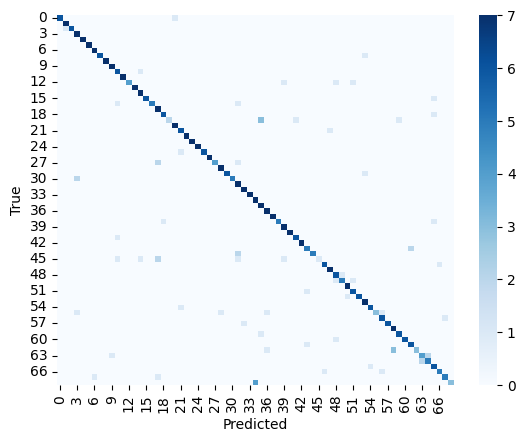

In [ ]:
cm = confusion_matrix(df.file_class, df.pred)

sns.heatmap(cm, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()